In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
# import plotly.express as px
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('/Users/denise/Desktop/Eskwelabs/dsf11-sprint-1/data/micro_world.csv', encoding='ISO-8859-1')

In [3]:
# Filter to Philippne data only

philippine_data = data[
    data['economy'] == 'Philippines'
]

In [6]:
# Check for available values under educ
philippine_data['educ'].value_counts()

# there were no Filipino respondents who answered '4' - dk and '5' - rf

2    576
3    276
1    148
Name: educ, dtype: int64

In [7]:
# Check for available values under income
philippine_data['inc_q'].value_counts()

5    301
4    204
3    203
2    150
1    142
Name: inc_q, dtype: int64

# EDUCATION

# % of Population with an Account According to Educational Attainment

In [8]:
# Create another column for account ownership
philippine_data['has_acc'] = philippine_data['account'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['educ']).agg(
    total_acc_owners=('has_acc', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of population with accounts'] = grouped_data['total_acc_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/2828755443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_acc'] = philippine_data['account'].apply(


In [9]:
# Acc-Educ Dataset
acc_data = grouped_data.sort_values('% of population with accounts', ascending=False)
acc_data

,educ,total_acc_owners,total_population,% of population with accounts
2,3,248,276,89.855072
1,2,324,576,56.250000
0,1,55,148,37.162162


In [18]:
# Create a dictionary for mapping
acc_mapping = {
    1:'at most primary school',
    2:'secondary school',
    3:'at least tertiary education',
}

# Replace the acc_data values using the dictionary mapping
acc_data = acc_data.replace({'educ':acc_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


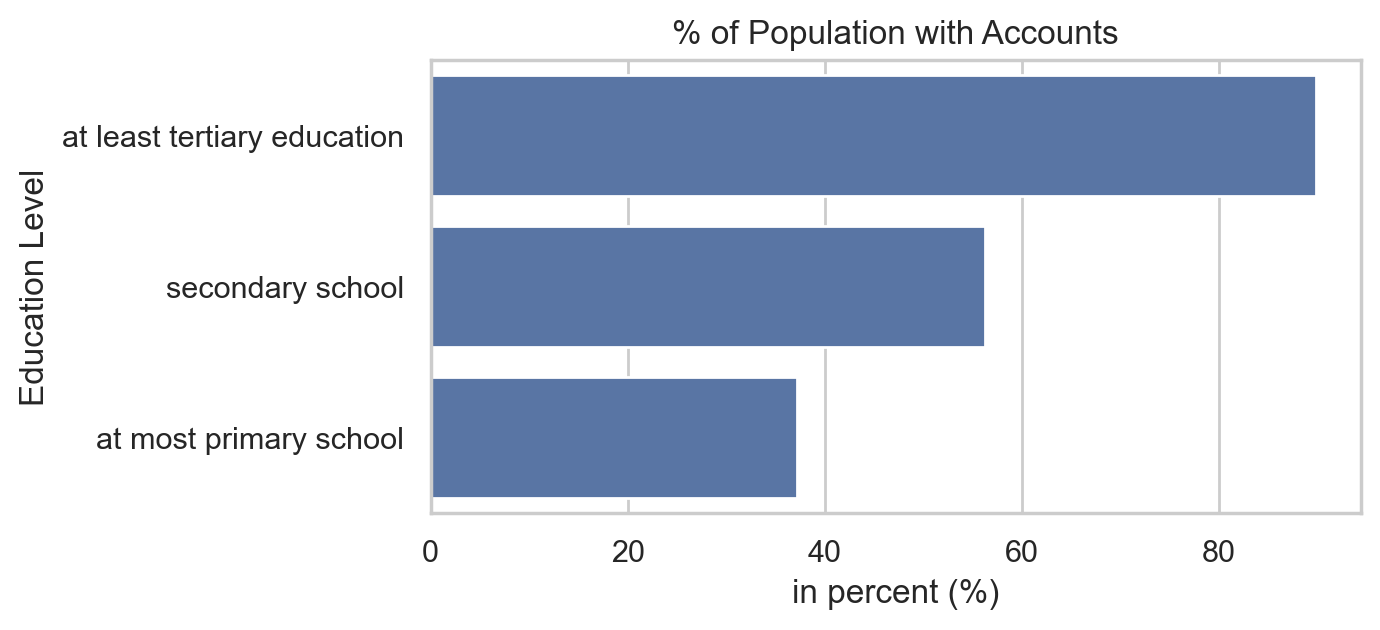

In [47]:
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    acc_data['% of population with accounts'],
    acc_data['educ'],
    color='b',
    orient = 'h'
)

# Set title
plt.title('% of Population with Accounts')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Education Level')

# Show figure
plt.show()

# % of Population with an Account at a Financial Institution According to Educational Attainment

In [20]:
# Create a column for account at FI ownership
philippine_data['has_acc_fin'] = philippine_data['account_fin'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['educ']).agg(
    total_acc_fin_owners=('has_acc_fin', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of population with accounts at fin'] = grouped_data['total_acc_fin_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/3324739436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_acc_fin'] = philippine_data['account_fin'].apply(


In [21]:
philippine_data['account_fin'].value_counts()

1    564
0    436
Name: account_fin, dtype: int64

In [22]:
# Acc_Fin-Educ Data Set
acc_fin_data = grouped_data.sort_values('% of population with accounts at fin', ascending=False)
acc_fin_data

,educ,total_acc_fin_owners,total_population,% of population with accounts at fin
2,3,239,276,86.594203
1,2,277,576,48.090278
0,1,48,148,32.432432


In [23]:
# Create a dictionary for mapping
acc_mapping = {
    1:'at most primary school',
    2:'secondary school',
    3:'at least tertiary education',
}

# Replace the acc_fin_data values using the dictionary mapping
acc_fin_data = acc_fin_data.replace({'educ':acc_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


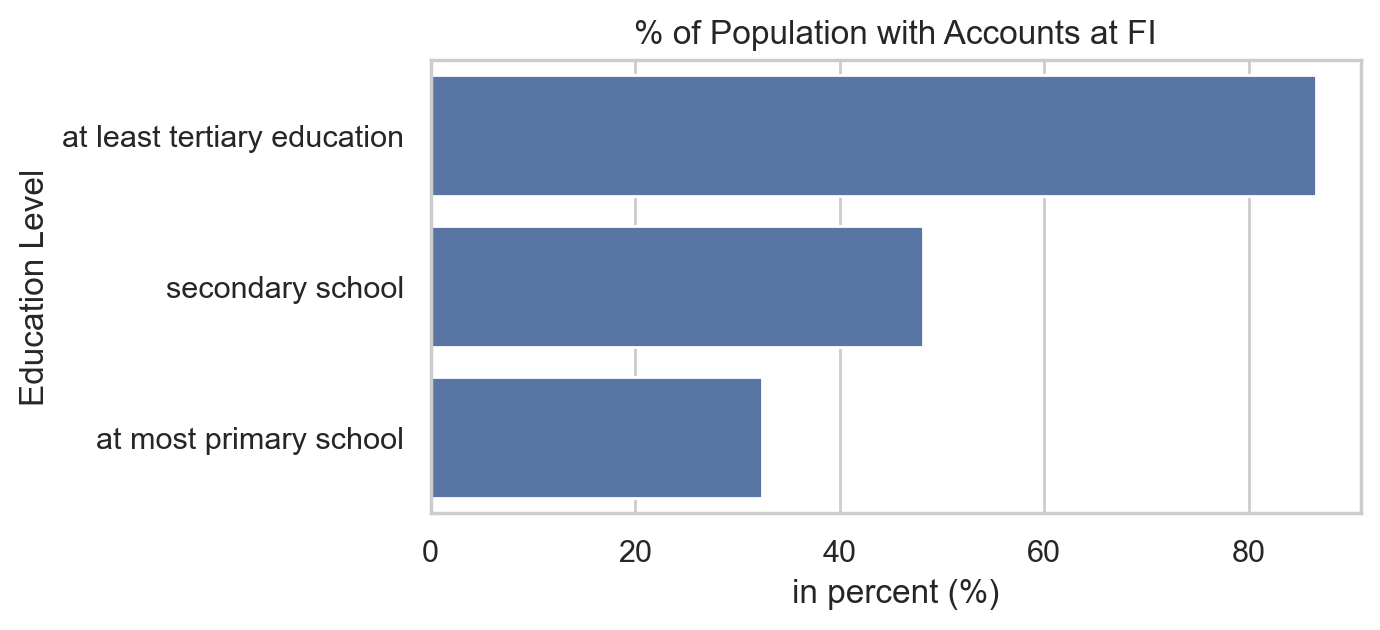

In [46]:
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    acc_fin_data['% of population with accounts at fin'],
    acc_fin_data['educ'],
    color='b',
    orient = 'h'
)

# Set title
plt.title('% of Population with Accounts at FI')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Education Level')

# Show figure
plt.show()

# % of Population with a Debit Card According to Educational Attainment

In [75]:
philippine_data['has_debit_card'] = philippine_data['fin2'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['educ']).agg(
    total_debitcard_owners=('has_debit_card', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of population with debit card'] = grouped_data['total_debitcard_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/2080800508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_debit_card'] = philippine_data['fin2'].apply(


In [76]:
# Debit Card-Educ Dataset
debitcard_data = grouped_data.sort_values('% of population with debit card', ascending=False)
debitcard_data

,educ,total_debitcard_owners,total_population,% of population with debit card
2,3,208,276,75.362319
1,2,160,576,27.777778
0,1,20,148,13.513514


In [77]:
# Create a dictionary for mapping
debitcard_mapping = {
    1:'at most primary school',
    2:'secondary school',
    3:'at least tertiary education',
}

# Replace the acc_fin_data values using the dictionary mapping
debitcard_data = debitcard_data.replace({'educ':debitcard_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


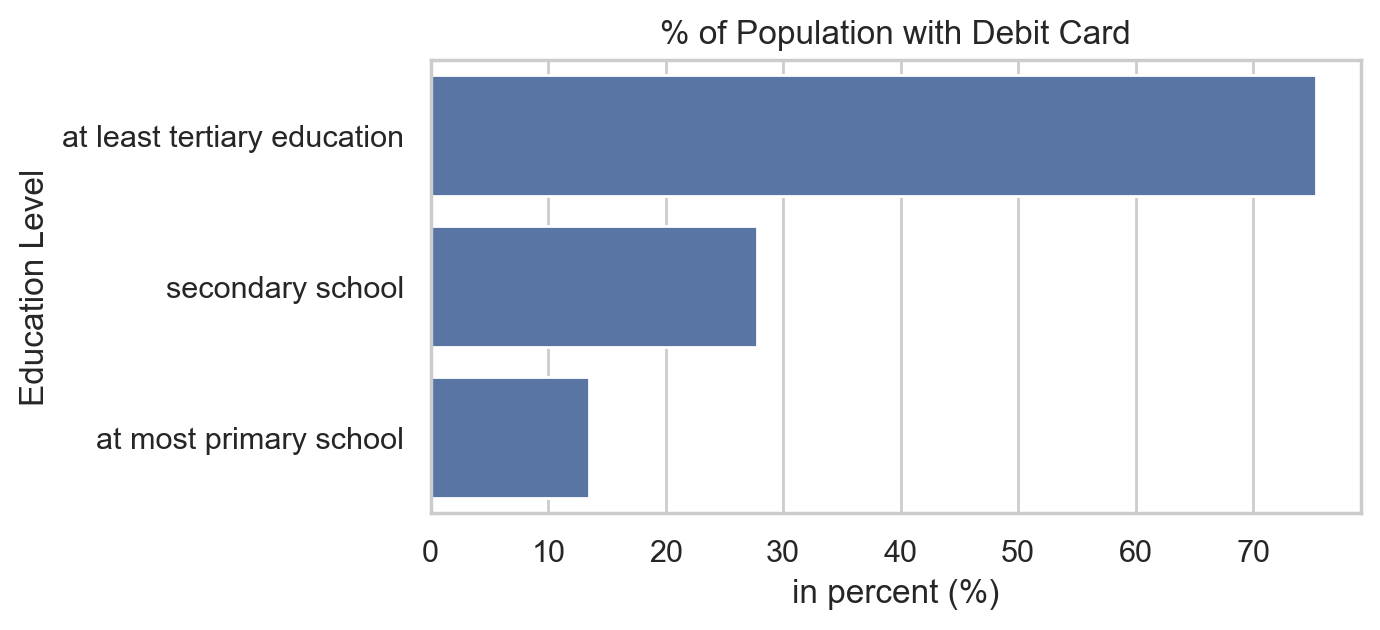

In [78]:
# Plot

sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    debitcard_data['% of population with debit card'],
    debitcard_data['educ'],
    color='b',
    orient = 'h'
)

# Set title
plt.title('% of Population with Debit Card')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Education Level')

# Show figure
plt.show()

# INCOME

# % of Population with an Account According to Income

In [50]:
# Create a column for account ownership
philippine_data['has_acc'] = philippine_data['account'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['inc_q']).agg(
    total_acc_owners=('has_acc', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute acc ownership in %
grouped_data['% of population with accounts'] = grouped_data['total_acc_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/2676991474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_acc'] = philippine_data['account'].apply(


In [51]:
# Acc-Income Dataset
acc_data = grouped_data.sort_values('% of population with accounts', ascending=False)
acc_data

,inc_q,total_acc_owners,total_population,% of population with accounts
4,5,260,301,86.378738
3,4,145,204,71.078431
2,3,109,203,53.694581
0,1,56,142,39.436620
1,2,57,150,38.000000


In [52]:
# Create a dictionary for mapping
acc_mapping = {
    1:'poorest 20%',
    2:'second poorest 20%',
    3:'middle 20%',
    4: 'second richest 20%',
    5: 'richest 20%'
}

# Replace the acc_data values using the dictionary mapping
acc_data = acc_data.replace({'inc_q':acc_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


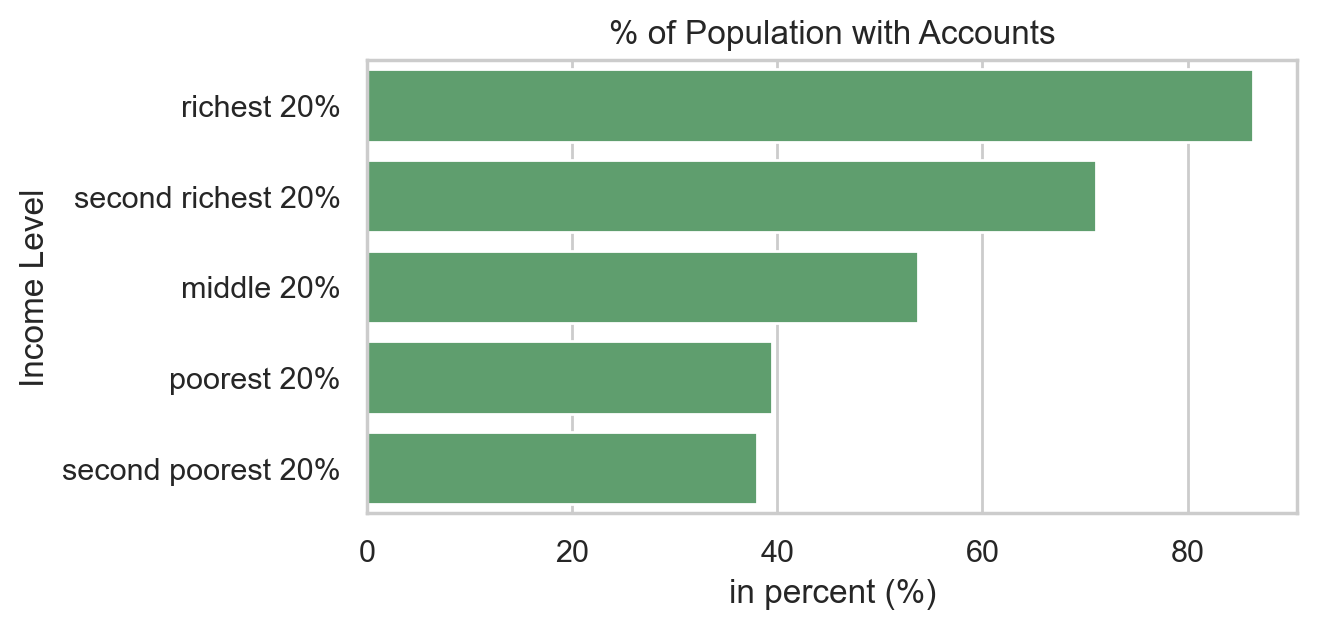

In [54]:
# Plot

sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    acc_data['% of population with accounts'],
    acc_data['inc_q'],
    color='g',
    orient = 'h'
)

# Set title
plt.title('% of Population with Accounts')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Income Level')

# Show figure
plt.show()

# % of Population with an Account At A Financial Institution According to Income

In [55]:
# Create another column for account at FI ownership
philippine_data['has_acc_fin'] = philippine_data['account_fin'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['inc_q']).agg(
    total_acc_fin_owners=('has_acc_fin', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute acc_fin ownership in %
grouped_data['% of population with accounts at fin'] = grouped_data['total_acc_fin_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/1329934250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_acc_fin'] = philippine_data['account_fin'].apply(


In [56]:
# Acc_Fin-Inc Data Set
acc_fin_data = grouped_data.sort_values('% of population with accounts at fin', ascending=False)
acc_fin_data

,inc_q,total_acc_fin_owners,total_population,% of population with accounts at fin
4,5,242,301,80.398671
3,4,127,204,62.254902
2,3,95,203,46.798030
1,2,52,150,34.666667
0,1,48,142,33.802817


In [57]:
# Create a dictionary for mapping
acc_fin_mapping = {
    1:'poorest 20%',
    2:'second poorest 20%',
    3:'middle 20%',
    4: 'second richest 20%',
    5: 'richest 20%'
}

# Replace the acc_fin_data values using the dictionary mapping
acc_fin_data = acc_fin_data.replace({'inc_q':acc_fin_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


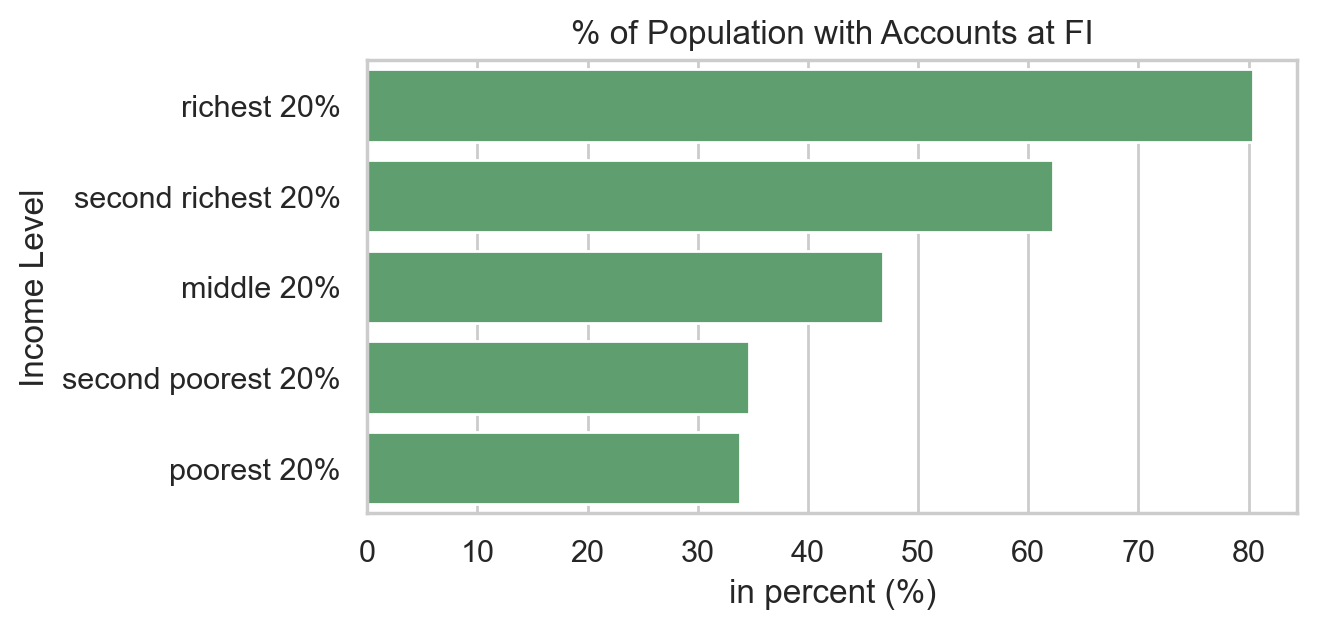

In [60]:
# Plot

sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    acc_fin_data['% of population with accounts at fin'],
    acc_fin_data['inc_q'],
    color='g',
    orient = 'h'
)

# Set title
plt.title('% of Population with Accounts at FI')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Income Level')

# Show figure
plt.show()

# % of Population with a Debit Card According to Income

In [83]:
philippine_data['has_debit_card'] = philippine_data['fin2'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = philippine_data.groupby(['inc_q']).agg(
    total_debitcard_owners=('has_debit_card', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of population with debit card'] = grouped_data['total_debitcard_owners']*100.0/grouped_data['total_population']


/var/folders/kd/0d50xn050nzc64_d40jpgjp80000gn/T/ipykernel_4930/251213506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippine_data['has_debit_card'] = philippine_data['fin2'].apply(


In [84]:
# Debit Card-Income Dataset
debitcard_data = grouped_data.sort_values('% of population with debit card', ascending=False)
debitcard_data

,inc_q,total_debitcard_owners,total_population,% of population with debit card
4,5,208,301,69.102990
3,4,82,204,40.196078
2,3,53,203,26.108374
0,1,22,142,15.492958
1,2,23,150,15.333333


In [85]:
# Create a dictionary for mapping
debitcard_mapping = {
    1:'poorest 20%',
    2:'second poorest 20%',
    3:'middle 20%',
    4: 'second richest 20%',
    5: 'richest 20%'
}

# Replace the acc_fin_data values using the dictionary mapping
debitcard_data = debitcard_data.replace({'inc_q':debitcard_mapping})

/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


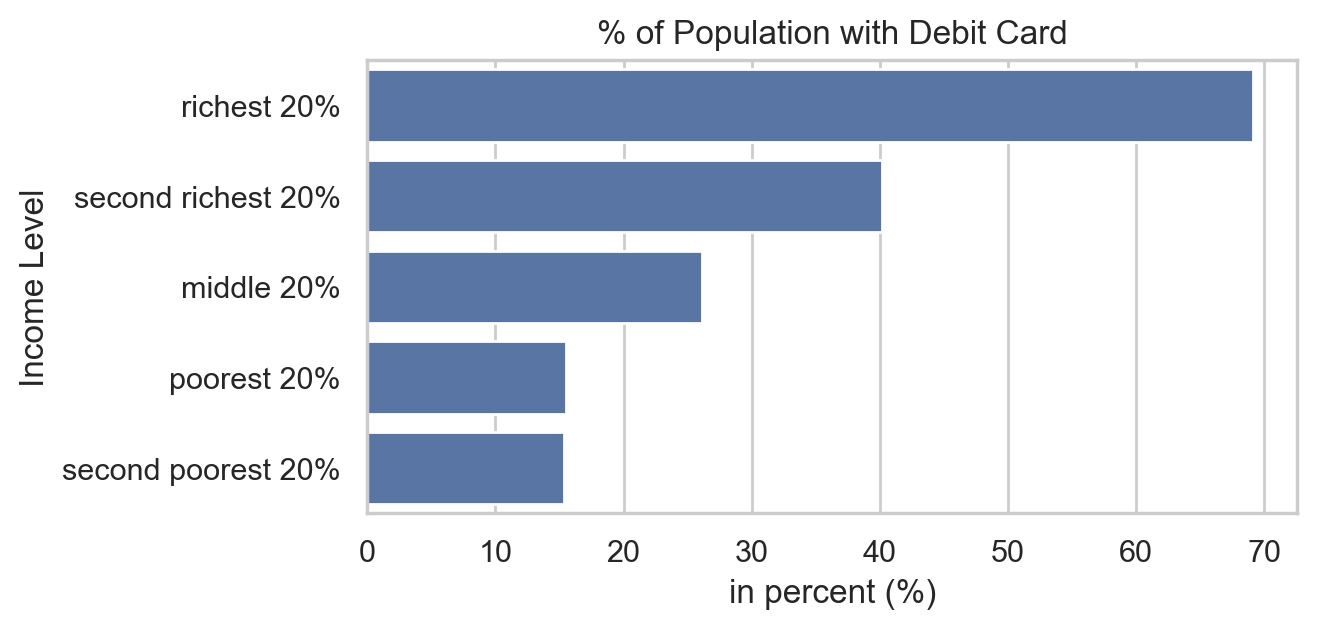

In [86]:
# Plot

sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    debitcard_data['% of population with debit card'],
    debitcard_data['inc_q'],
    color='b',
    orient = 'h'
)

# Set title
plt.title('% of Population with Debit Card')

# Set labels
a.set(xlabel='in percent (%)')
plt.ylabel('Income Level')

# Show figure
plt.show()